In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings(action='ignore')


In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\elcot\anaconda3\lib\site-packages (0.24.1)



In [117]:
import pandas as pd
data=pd.read_csv('kidney_disease.csv')
data.head(8)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd


In [55]:
data.shape

(400, 26)

In [56]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [57]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [92]:
X=data.iloc[:,:-1]
y=data['id']

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [131]:
X_train.value_counts()

id   age   bp    sg     al   su   rbc       pc        pcc         ba          bgr    bu     sc    sod    pot  hemo  pcv  wc     rc   htn  dm   cad  appet  pe   ane
3    48.0  70.0  1.005  4.0  0.0  normal    abnormal  present     notpresent  117.0  56.0   3.8   111.0  2.5  11.2  32   6700   3.9  yes  no   no   poor   yes  yes    1
353  39.0  60.0  1.020  0.0  0.0  normal    normal    notpresent  notpresent  86.0   37.0   0.6   150.0  5.0  13.6  51   5800   4.5  no   no   no   good   no   no     1
351  29.0  80.0  1.020  0.0  0.0  normal    normal    notpresent  notpresent  83.0   49.0   0.9   139.0  3.3  17.5  40   9900   4.7  no   no   no   good   no   no     1
348  38.0  80.0  1.020  0.0  0.0  normal    normal    notpresent  notpresent  99.0   19.0   0.5   147.0  3.5  13.6  44   7300   6.4  no   no   no   good   no   no     1
345  22.0  60.0  1.025  0.0  0.0  normal    normal    notpresent  notpresent  97.0   18.0   1.2   138.0  4.3  13.5  42   7900   6.4  no   no   no   good   no   

In [132]:
X.value_counts()

id   age   bp    sg     al   su   rbc     pc        pcc         ba          bgr    bu    sc   sod    pot  hemo  pcv  wc     rc   htn  dm  cad  appet  pe   ane
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal  present     notpresent  117.0  56.0  3.8  111.0  2.5  11.2  32   6700   3.9  yes  no  no   poor   yes  yes    1
343  37.0  60.0  1.025  0.0  0.0  normal  normal    notpresent  notpresent  111.0  35.0  0.8  135.0  4.1  16.2  50   5500   5.7  no   no  no   good   no   no     1
335  60.0  60.0  1.020  0.0  0.0  normal  normal    notpresent  notpresent  134.0  45.0  0.5  139.0  4.8  14.2  48   10700  5.6  no   no  no   good   no   no     1
337  44.0  70.0  1.025  0.0  0.0  normal  normal    notpresent  notpresent  92.0   40.0  0.9  141.0  4.9  14.0  52   7500   6.2  no   no  no   good   no   no     1
338  62.0  80.0  1.020  0.0  0.0  normal  normal    notpresent  notpresent  132.0  34.0  0.8  147.0  3.5  17.8  44   4700   4.5  no   no  no   good   no   no     1
                     

In [133]:
y_train.value_counts()

0      1
1      1
266    1
265    1
264    1
      ..
129    1
128    1
127    1
126    1
399    1
Name: id, Length: 320, dtype: int64

In [134]:
y.value_counts()

0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64

In [135]:
X_test.value_counts()

id   age   bp     sg     al   su   rbc       pc        pcc         ba          bgr    bu     sc    sod    pot  hemo  pcv  wc     rc   htn  dm   cad  appet  pe   ane
11   63.0  70.0   1.010  3.0  0.0  abnormal  abnormal  present     notpresent  380.0  60.0   2.7   131.0  4.2  10.8  32   4500   3.8  yes  yes  no   poor   yes  no     1
58   73.0  80.0   1.020  2.0  0.0  abnormal  abnormal  notpresent  notpresent  253.0  142.0  4.6   138.0  5.8  10.5  33   7200   4.3  yes  yes  yes  good   no   no     1
321  65.0  60.0   1.020  0.0  0.0  normal    normal    notpresent  notpresent  109.0  39.0   1.0   144.0  3.5  13.9  48   9600   4.8  no   no   no   good   no   no     1
339  25.0  70.0   1.020  0.0  0.0  normal    normal    notpresent  notpresent  88.0   42.0   0.5   136.0  3.5  13.3  48   7000   4.9  no   no   no   good   no   no     1
342  44.0  60.0   1.020  0.0  0.0  normal    normal    notpresent  notpresent  95.0   46.0   0.5   138.0  4.2  15.0  50   7700   6.3  no   no   no   good  

In [136]:
y_test.value_counts()

107    1
385    1
223    1
222    1
92     1
      ..
41     1
296    1
165    1
350    1
382    1
Name: id, Length: 80, dtype: int64

In [95]:
print(X_train)

      id   age     bp     sg   al   su       rbc        pc         pcc  \
93    93  73.0  100.0  1.010  3.0  2.0  abnormal  abnormal     present   
23    23  21.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
299  299  73.0   60.0  1.020  0.0  0.0    normal    normal  notpresent   
13    13  68.0   70.0    NaN  NaN  NaN       NaN       NaN  notpresent   
90    90  63.0  100.0  1.010  2.0  2.0    normal    normal  notpresent   
..   ...   ...    ...    ...  ...  ...       ...       ...         ...   
255  255  34.0   80.0  1.025  0.0  0.0    normal    normal  notpresent   
72    72  64.0   90.0  1.010  3.0  3.0       NaN  abnormal     present   
396  396  42.0   70.0  1.025  0.0  0.0    normal    normal  notpresent   
235  235  45.0   70.0  1.010  2.0  0.0       NaN    normal  notpresent   
37    37  72.0   80.0    NaN  NaN  NaN       NaN       NaN  notpresent   

             ba  ...  hemo  pcv     wc   rc  htn   dm  cad appet   pe  ane  
93   notpresent  ...   9.2   30   

In [96]:
print(X_test)

      id   age    bp     sg   al   su       rbc        pc         pcc  \
398  398  17.0  60.0  1.025  0.0  0.0    normal    normal  notpresent   
125  125  72.0  90.0    NaN  NaN  NaN       NaN       NaN  notpresent   
328  328  28.0  70.0  1.020  0.0  0.0    normal    normal         NaN   
339  339  25.0  70.0  1.020  0.0  0.0    normal    normal  notpresent   
172  172  62.0  80.0  1.010  1.0  2.0       NaN       NaN  notpresent   
..   ...   ...   ...    ...  ...  ...       ...       ...         ...   
347  347  43.0  60.0  1.025  0.0  0.0    normal    normal  notpresent   
41    41  45.0  70.0  1.010  0.0  0.0       NaN    normal  notpresent   
180  180  73.0  90.0  1.010  1.0  4.0  abnormal  abnormal     present   
132  132  50.0   NaN    NaN  NaN  NaN    normal       NaN  notpresent   
224  224  34.0  60.0  1.020  0.0  0.0       NaN    normal  notpresent   

             ba  ...  hemo  pcv     wc   rc  htn   dm cad appet   pe  ane  
398  notpresent  ...  14.2   51   7200  5.9   n

In [97]:
print(y_train)

93      93
23      23
299    299
13      13
90      90
      ... 
255    255
72      72
396    396
235    235
37      37
Name: id, Length: 320, dtype: int64


In [98]:
print(y_test)

398    398
125    125
328    328
339    339
172    172
      ... 
347    347
41      41
180    180
132    132
224    224
Name: id, Length: 80, dtype: int64


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm

In [100]:
pip install scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


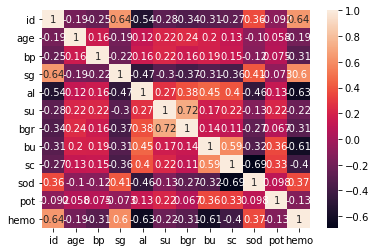

In [76]:
var=sns.heatmap(data.corr(),annot=True)
plt.show()

In [142]:
model=svm.SVC(kernel='linear')

In [144]:

SVCM=model.fit(X_train, y_train,  sample_weight=sum(null),batch_size=8, epochs=5)

NameError: name 'null' is not defined

In [120]:
pred=SVCM.predict(X_test)

NameError: name 'SVCM' is not defined

In [138]:
metrics.confusion_matrix(pred,y_test)

NameError: name 'pred' is not defined

In [139]:
metrics.accuracy_score(pred,y_test)

NameError: name 'pred' is not defined

In [140]:
print(metrics.classification_report(y_test,pred))

NameError: name 'pred' is not defined